# Example: ANN - Classification 

In [1]:
# first neural network with keras tutorial
# !python3 -m pip install tensorflow
# !pip install tensorflow
from numpy import loadtxt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2022-10-14 14:33:29.596409: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-14 14:33:29.757162: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/melodic/lib
2022-10-14 14:33:29.757181: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-14 14:33:29.786628: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-14 14:33:30.421481: W

In [2]:
# load the dataset
dataset = loadtxt('datasets_heart_noheader.csv', delimiter=',')
# split into input (X) and output (y) variables
print(dataset.shape)
MM,NN = dataset.shape 
XX = dataset[:,0:NN-1] 
YY = dataset[:,NN-1]
X, X2, y, y2 = train_test_split(XX, YY, test_size=0.1)

print(X2)
print(y2)

(303, 14)
[[4.80e+01 1.00e+00 1.00e+00 1.10e+02 2.29e+02 0.00e+00 1.00e+00 1.68e+02
  0.00e+00 1.00e+00 0.00e+00 0.00e+00 3.00e+00]
 [6.20e+01 1.00e+00 1.00e+00 1.20e+02 2.81e+02 0.00e+00 0.00e+00 1.03e+02
  0.00e+00 1.40e+00 1.00e+00 1.00e+00 3.00e+00]
 [4.30e+01 1.00e+00 0.00e+00 1.20e+02 1.77e+02 0.00e+00 0.00e+00 1.20e+02
  1.00e+00 2.50e+00 1.00e+00 0.00e+00 3.00e+00]
 [4.00e+01 1.00e+00 0.00e+00 1.10e+02 1.67e+02 0.00e+00 0.00e+00 1.14e+02
  1.00e+00 2.00e+00 1.00e+00 0.00e+00 3.00e+00]
 [5.90e+01 1.00e+00 0.00e+00 1.70e+02 3.26e+02 0.00e+00 0.00e+00 1.40e+02
  1.00e+00 3.40e+00 0.00e+00 0.00e+00 3.00e+00]
 [5.70e+01 1.00e+00 0.00e+00 1.52e+02 2.74e+02 0.00e+00 1.00e+00 8.80e+01
  1.00e+00 1.20e+00 1.00e+00 1.00e+00 3.00e+00]
 [6.00e+01 1.00e+00 0.00e+00 1.40e+02 2.93e+02 0.00e+00 0.00e+00 1.70e+02
  0.00e+00 1.20e+00 1.00e+00 2.00e+00 3.00e+00]
 [6.00e+01 0.00e+00 3.00e+00 1.50e+02 2.40e+02 0.00e+00 1.00e+00 1.71e+02
  0.00e+00 9.00e-01 2.00e+00 0.00e+00 2.00e+00]
 [6.00e+01 0.0

In [3]:
# define the keras model
model = Sequential()
model.add(Dense(200, input_dim=NN-1, activation='relu'))
model.add(Dense(100, activation='relu'))
# model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

2022-10-14 14:33:32.069206: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-10-14 14:33:32.069230: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mpheng-Lenovo-ideapad-520-15IKB): /proc/driver/nvidia/version does not exist
2022-10-14 14:33:32.069425: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
# fit the keras model on the dataset
history = model.fit(X, y, epochs=900, batch_size=10,verbose=0)

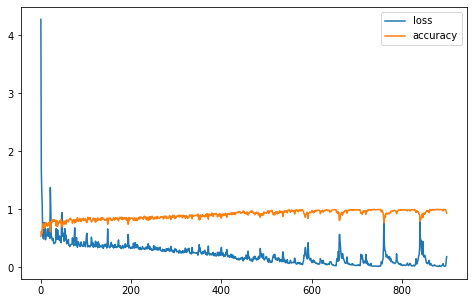

In [6]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [7]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

9/9 [==============================] - 0s 947us/step - loss: 0.0736 - accuracy: 0.9779
Accuracy: 97.79


In [8]:
# make probability predictions with the model
predictions = model.predict(X)
# round predictions 
rounded = [round(x[0]) for x in predictions]

9/9 [==============================] - 0s 1ms/step


In [9]:
for i in range(len(y)):
    print('Test sample', i , ', class label=', y[i],'\t, predicted=', predictions[i], ' rounded=',rounded[i])
print('==========================\nNumber of wrong predictions=', abs(np.sum(y-rounded)) ,'\t out of', len(y), 'samples')

Test sample 0 , class label= 1.0 	, predicted= [0.8681845]  rounded= 1
Test sample 1 , class label= 1.0 	, predicted= [0.8055132]  rounded= 1
Test sample 2 , class label= 1.0 	, predicted= [0.1190108]  rounded= 0
Test sample 3 , class label= 0.0 	, predicted= [0.00051338]  rounded= 0
Test sample 4 , class label= 0.0 	, predicted= [0.01358211]  rounded= 0
Test sample 5 , class label= 0.0 	, predicted= [0.00183256]  rounded= 0
Test sample 6 , class label= 1.0 	, predicted= [0.6731206]  rounded= 1
Test sample 7 , class label= 0.0 	, predicted= [3.4351963e-14]  rounded= 0
Test sample 8 , class label= 0.0 	, predicted= [2.278809e-10]  rounded= 0
Test sample 9 , class label= 1.0 	, predicted= [0.9996739]  rounded= 1
Test sample 10 , class label= 1.0 	, predicted= [1.]  rounded= 1
Test sample 11 , class label= 0.0 	, predicted= [4.2155266e-06]  rounded= 0
Test sample 12 , class label= 0.0 	, predicted= [0.01998345]  rounded= 0
Test sample 13 , class label= 0.0 	, predicted= [0.16210584]  roun

Test sample 120 , class label= 0.0 	, predicted= [0.01674432]  rounded= 0
Test sample 121 , class label= 1.0 	, predicted= [0.99569774]  rounded= 1
Test sample 122 , class label= 1.0 	, predicted= [0.9974061]  rounded= 1
Test sample 123 , class label= 0.0 	, predicted= [0.0001435]  rounded= 0
Test sample 124 , class label= 0.0 	, predicted= [0.00338788]  rounded= 0
Test sample 125 , class label= 0.0 	, predicted= [0.00309369]  rounded= 0
Test sample 126 , class label= 1.0 	, predicted= [1.]  rounded= 1
Test sample 127 , class label= 0.0 	, predicted= [6.9942407e-12]  rounded= 0
Test sample 128 , class label= 1.0 	, predicted= [0.9879442]  rounded= 1
Test sample 129 , class label= 0.0 	, predicted= [0.2865654]  rounded= 0
Test sample 130 , class label= 1.0 	, predicted= [0.4832366]  rounded= 0
Test sample 131 , class label= 0.0 	, predicted= [1.5600094e-07]  rounded= 0
Test sample 132 , class label= 0.0 	, predicted= [0.6793764]  rounded= 1
Test sample 133 , class label= 0.0 	, predicte

In [10]:
# evaluate the keras model, testing
_, accuracy = model.evaluate(X2, y2)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 18ms/step - loss: 0.9589 - accuracy: 0.7742
Accuracy: 77.42


In [11]:
len(X)

272

In [12]:
# make probability predictions with the model, testing
predictions = model.predict(X2)
# round predictions 
rounded = [round(x[0]) for x in predictions]

1/1 [==============================] - 0s 17ms/step


In [13]:
for i in range(len(y2)):
    print('Test sample', i , ', class label=', y2[i],'\t, predicted=', predictions[i], ' rounded=',rounded[i])
    
print('==========================\nNumber of wrong predictions=', abs(np.sum(y2-rounded)),'\t out of', len(y2), 'samples')

Test sample 0 , class label= 0.0 	, predicted= [0.18595718]  rounded= 0
Test sample 1 , class label= 0.0 	, predicted= [0.76337844]  rounded= 1
Test sample 2 , class label= 0.0 	, predicted= [3.4881532e-07]  rounded= 0
Test sample 3 , class label= 0.0 	, predicted= [3.0932447e-06]  rounded= 0
Test sample 4 , class label= 0.0 	, predicted= [2.0464384e-11]  rounded= 0
Test sample 5 , class label= 0.0 	, predicted= [2.7694224e-11]  rounded= 0
Test sample 6 , class label= 0.0 	, predicted= [4.140823e-05]  rounded= 0
Test sample 7 , class label= 1.0 	, predicted= [0.9998418]  rounded= 1
Test sample 8 , class label= 0.0 	, predicted= [4.0176445e-05]  rounded= 0
Test sample 9 , class label= 0.0 	, predicted= [0.01275438]  rounded= 0
Test sample 10 , class label= 0.0 	, predicted= [1.1392285e-09]  rounded= 0
Test sample 11 , class label= 1.0 	, predicted= [0.6871928]  rounded= 1
Test sample 12 , class label= 1.0 	, predicted= [0.9997313]  rounded= 1
Test sample 13 , class label= 0.0 	, predict